# ANOVA

Ron Fisher recognized the value of the $t$-test as created by William Sealy Gossett and developed the mathematical extension needed to use the same ideas with more than 2 samples.

## Example: Coping Humor

Let's question whether, in the personality data set, the average coping humor (CHS) varies based upon Primary Humor Style (PHS). We will first load and then subset the data properly:

In [4]:
pers <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
humor <- pers[ , c('CHS','PHS')]
head(humor,5)

CHS PHS
1 28  SE 
2 29  SE 
3 30  AG 
4 27  SE 
5 24  AF

### Hypotheses

The null hypothesis states that the four group means will all be approximately equal. The four primary humor styles are *Affiliative*, *Aggressive*, *Self-Defeating* and *Self-Enhancing* and will be abbreviate as **af**, **ag**, **sd** and **se** respectively. The alternative is usually included in words as shown:

$$\begin{align} H_0 &: \mu_{af} = \mu_{ag} = \mu_{sd} = \mu_{se}\\H_a &: \text{At least 1 group mean differs from the others}\end{align}$$

### Verifying the Assumptions

We need to perform the following steps:
1. Create the linear model usinig the function **lm()**.
2. Create a vector of residuals based upon the model.
3. Display a density plot of the residuals (checking for evidence of normality).
4. Display a QQ plot for the residuals (checking that all dots are reasonably close to the QQ line).

These steps are all performed in the single code below directly below.

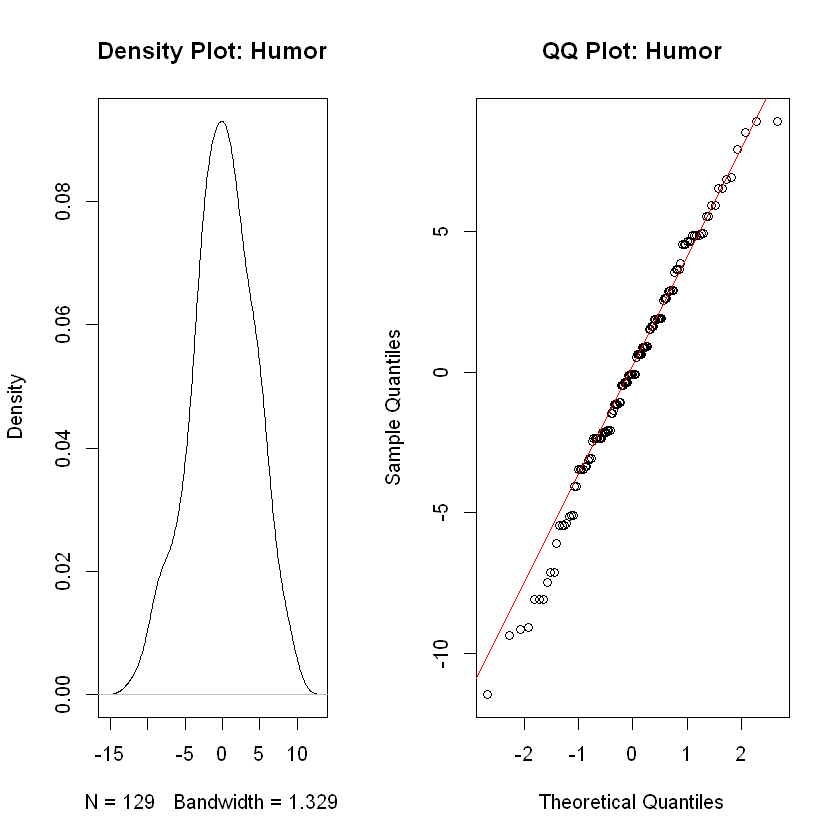

In [12]:
mod = lm(CHS ~ PHS, data = humor)
res = residuals(mod)
layout(matrix(c(1,2), ncol = 2), lcm(8))
plot(density(res), main = 'Density Plot: Humor')
plot2 <- { qqnorm(mod$residual, main = 'QQ Plot: Humor')
qqline(mod$residual, col = 'red') }

**Analysis**

The QQ plot is slightly concerning as the lower tail seems quite heavy, yet the density plot shows evidence these data were drawn from a normally distributed population. These data are appropriate for ANOVA methods though the heavy tail does indicate a small degree of concern about accuracy of $p$-values.

### Conducting the ANOVA

In [15]:
anova <- aov(mod)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
PHS           3  418.7  139.55   7.743 8.74e-05 ***
Residuals   125 2252.8   18.02                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Reporting Out

With $p = 8.74\times 10^{-5} < 0.05 = \alpha$, we reject the null. We have evidence, therefore, that at least one of the group means is significantly different than the others.

## Tukey HSD *Post Hoc* Testing

Whenever we reject the null in an ANOVA, we must conduct a *post hoc* test to ferret out all the significant differences between group means.

In [16]:
TukeyHSD(anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mod)

$PHS
           diff        lwr       upr     p adj
AG-AF -1.385338 -4.1385491 1.3678724 0.5581859
SD-AF -2.100649 -4.9409691 0.7396704 0.2225615
SE-AF  2.669048 -0.2357284 5.5738237 0.0837472
SD-AG -0.715311 -3.3456923 1.9150703 0.8937175
SE-AG  4.054386  1.3545316 6.7542403 0.0008566
SE-SD  4.769697  1.9810664 7.5583275 0.0001080


The significant differences are indicated in rows 3, 5 and 6 where:
1. The upper and lower bounds of the confidence interval estimates both have the same sign, or
2. The indicated $p$-value is less than $\alpha = 0.05$.

Thus, we have evidence for a difference between the means of the following pairs of groups:
- Self-enhancing vs. Affiliative
- Self-enhancing vs. Aggressive
- Self-enhancing vs. Self-defeating